In [16]:
%matplotlib notebook
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(seed=1)

In [17]:
nb_of_samples_per_class = 20
red_mean = (-1, 0)
blue_mean = (1, 0)
x_red = np.random.randn(nb_of_samples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) + blue_mean

X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class, 1)),
             np.ones((nb_of_samples_per_class, 1))))

<IPython.core.display.Javascript object>


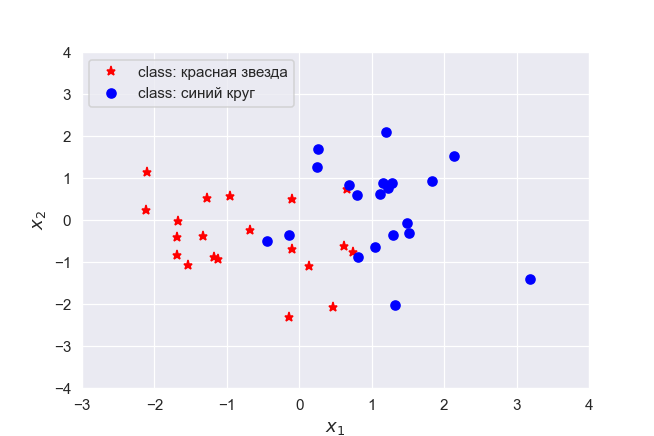

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(x_red[:, 0], x_red[:, 1], 'r*', label='class: красная звезда')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: синий круг')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.show()

In [19]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

# y = 1 / (1 + numpy.exp(-x * w))

def nn(x, w):
    return logistic(x.dot(w.T))

def nn_predict(x, w):
    return np.around(nn(x, w))

def loss(y, t):
    return - np.mean(
        np.multiply(t, np.log(y)) + np.multiply((1 - t), np.log(1 - y))
    )

<IPython.core.display.Javascript object>


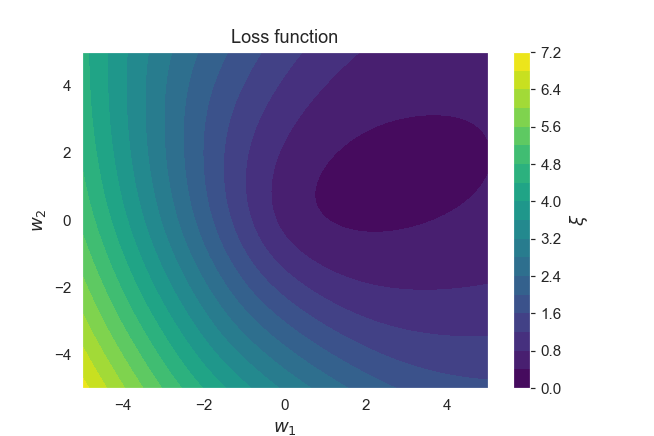

In [20]:
nb_of_ws = 100
wsa = np.linspace(-5, 5, num=nb_of_ws)
wsb = np.linspace(-5, 5, num=nb_of_ws)
ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws))
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i, j] = loss(
            nn(X, np.asmatrix([ws_x[i, j], ws_y[i, j]])), t)
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function')
plt.grid()

In [21]:
def gradient(w, x, t):
    return (nn(x, w) - t).T * x

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)

In [22]:
w = np.asmatrix([-4, -2])
learning_rate = .05

nb_of_iterations = 10
w_iter = [w]
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w - dw
    w_iter.append(w)

<IPython.core.display.Javascript object>


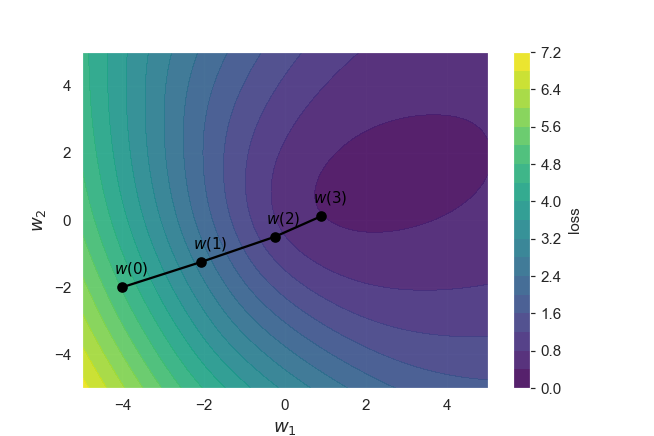

In [23]:
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=.9, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    plt.plot(w1[0,0], w1[0,1], 'ko')  
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'k-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='k')
w1 = w_iter[3]    
plt.plot(w1[0, 0], w1[0, 1], 'ko')
plt.text(w1[0, 0]-.2, w1[0, 1]+.4, f'$w({i})$', color='k')
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


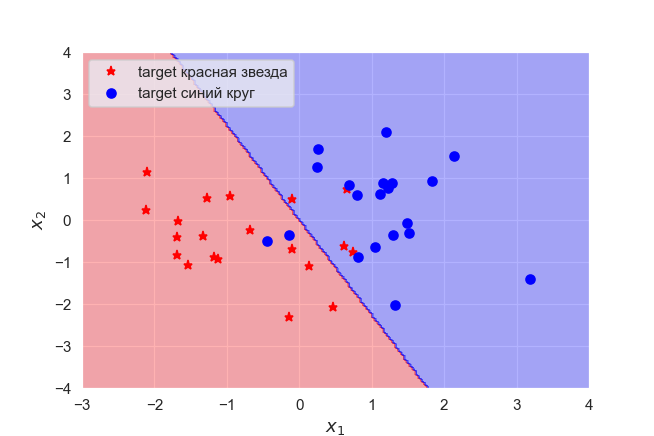

In [24]:
plt.figure(figsize=(6, 4))
nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb)
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i, j] = nn_predict(
                   np.asmatrix([xx[i, j], yy[i, j]]), w)
cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=.3),
    colorConverter.to_rgba('b', alpha=.3)])
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target красная звезда')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target синий круг')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.show()

In [25]:
# import tensorflow as tf
import tensorflow_datasets as datasets
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
mnist = datasets.load(name='mnist')

In [26]:
h1_nodes = 500
h2_nodes = 600
h3_nodes = 300

In [27]:
n_classes = 10
batch_size = 100

x = tf.placeholder('float64', [None, 784])
y = tf.placeholder('float64')

In [28]:
def print_shape(obj):
    print(obj.get_shape().as_list())
    
def ann_model(data):
    data = tf.cast(data, tf.float32)
    
    hidden1 = {'weights': tf.Variable(tf.random_normal([784, h1_nodes])),
              'biases': tf.Variable(tf.random_normal([h1_nodes]))}
    
    hidden2 = {'weights': tf.Variable(tf.random_normal([784, h2_nodes])),
              'biases': tf.Variable(tf.random_normal([h1_nodes]))}
    
    hidden3 = {'weights': tf.Variable(tf.random_normal([784, h3_nodes])),
              'biases': tf.Variable(tf.random_normal([h1_nodes]))}
    
    output = {'weights': tf.Variable(tf.random_normal([h3_nodes, n_classes])),
              'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    l1 = tf.add(tf.matmul(data, hidden1['weights']), hidden1['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden2['weights']), hidden2['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden3['weights']), hidden3['biases'])
    l3 = tf.nn.relu(l3)
    
    output_layer = tf.add(tf.matmul(l3, output['weights']), output['biases'])
    
    return output_layer

In [29]:
def train_model(x, y):
    peredction = ann_model(x)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))
    
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    epochs=10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            e_loss = 0
            
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                e_loss += c
            print('Epoch', epoch, 'completed out of', epochs, 'with loss:', e_loss)
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy', accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
        
    

In [30]:
train_model(x, y)

ValueError: Dimensions must be equal, but are 500 and 784 for '{{node MatMul_3}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Relu_1, Variable_10/read)' with input shapes: [?,500], [784,600].